In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from utils import plot_2d, plot_classifier_boundary, test_model, test_model_with_standard_scaler
from sklearn.metrics import roc_auc_score

# POLY performing better

In [2]:
def G_SVC_poly():

 
    X, y = datasets.make_blobs(
        n_samples=[500, 500], 
        centers=[(3,5),(8,5)],             
        n_features=2, 
        cluster_std=[1, 1],
        random_state=42, 
        shuffle=False)


    return X, y

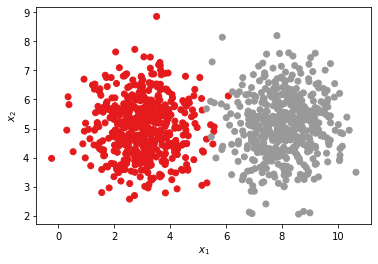

In [3]:
'''def G_SVC_RBF():
    
    X, y = datasets.make_circles(n_samples=(1000),
                                 noise=0.1,
                                 factor=0.7,
                                 random_state=42)
    
    return X+, y'''

X_poly, y_poly = G_SVC_poly()
plot_2d(X_poly, y_poly)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                                                    y_poly,
                                                    test_size=.33,
                                                    random_state=42)

In [5]:
param_grid_rbf = {'C': [0.001,0.01,0.1,1,5,10,15,20,30,40,50,60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [6]:
grid_rbf.best_params_

{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

In [7]:
model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

In [8]:
param_grid_poly = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50],
                   'kernel': ['poly'],
                   'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                   'degree': [1, 2, 3]}


grid_poly = GridSearchCV(SVC(), param_grid_poly)
grid_poly.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50],
                         'degree': [1, 2, 3],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['poly']})

In [9]:
model_poly = SVC(kernel='poly',
                 degree=grid_poly.best_params_['degree'],
                 C=grid_poly.best_params_['C'],
                 gamma=grid_poly.best_params_['gamma'],
                 random_state=42)

AUC score: 0.993


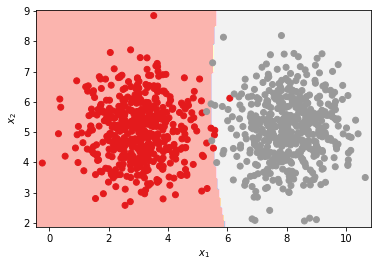

In [10]:
test_model(model_poly, X_poly, y_poly)

AUC score: 0.500


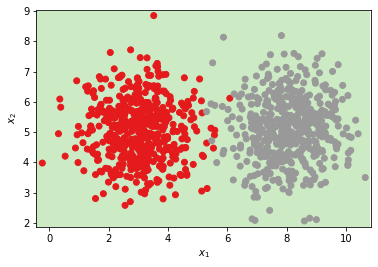

In [11]:
test_model(model_rbf, X_poly, y_poly);

# RBF performing better

In [12]:
def data_nn():

    nn_X, nn_y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    nn_y = nn_y % 2 
   
    return nn_X, nn_y

In [13]:
X_poly, y_poly = data_nn()

#X_poly, y_poly = datasets.make_circles(1000, factor=0.8, noise=.1, random_state=0)

#y_poly=y_poly[X_poly[:,1]<0] 
#X_poly=X_poly[X_poly[:,1]<0,:]
#X_poly[:, 1] = X_poly[:, 1] + 3

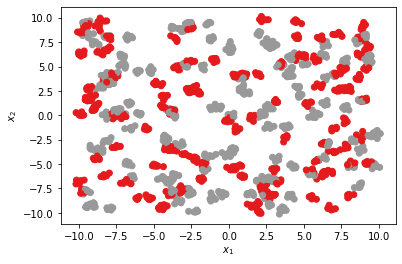

In [14]:
plot_2d(X_poly, y_poly)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                                                    y_poly,
                                                    test_size=.33,
                                                    random_state=42)

In [16]:
param_grid_rbf = {'C': [0.001,0.01,0.1,1,5,10,15,20,30,40,50,60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [17]:
model_rbf = SVC(kernel='rbf',
                random_state=42,
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'])

In [ ]:
param_grid_poly = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50],
                   'kernel': ['poly'],
                   'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                   'degree': [1, 2]}


grid_poly = GridSearchCV(SVC(), param_grid_poly)
grid_poly.fit(X_train, y_train)

In [ ]:
model_poly = SVC(kernel='poly',
                 degree=grid_poly.best_params_['degree'],
                 C=grid_poly.best_params_['C'],
                 gamma=grid_poly.best_params_['gamma'],
                 random_state=42)

In [ ]:
test_model(model_poly, X_poly, y_poly)

In [ ]:
test_model(model_rbf, X_poly, y_poly);